# Anuncios de trabajo fraudolentos (Machine Learning)
David Ravelli, Luca Roggio - UEM - curso 2024/25

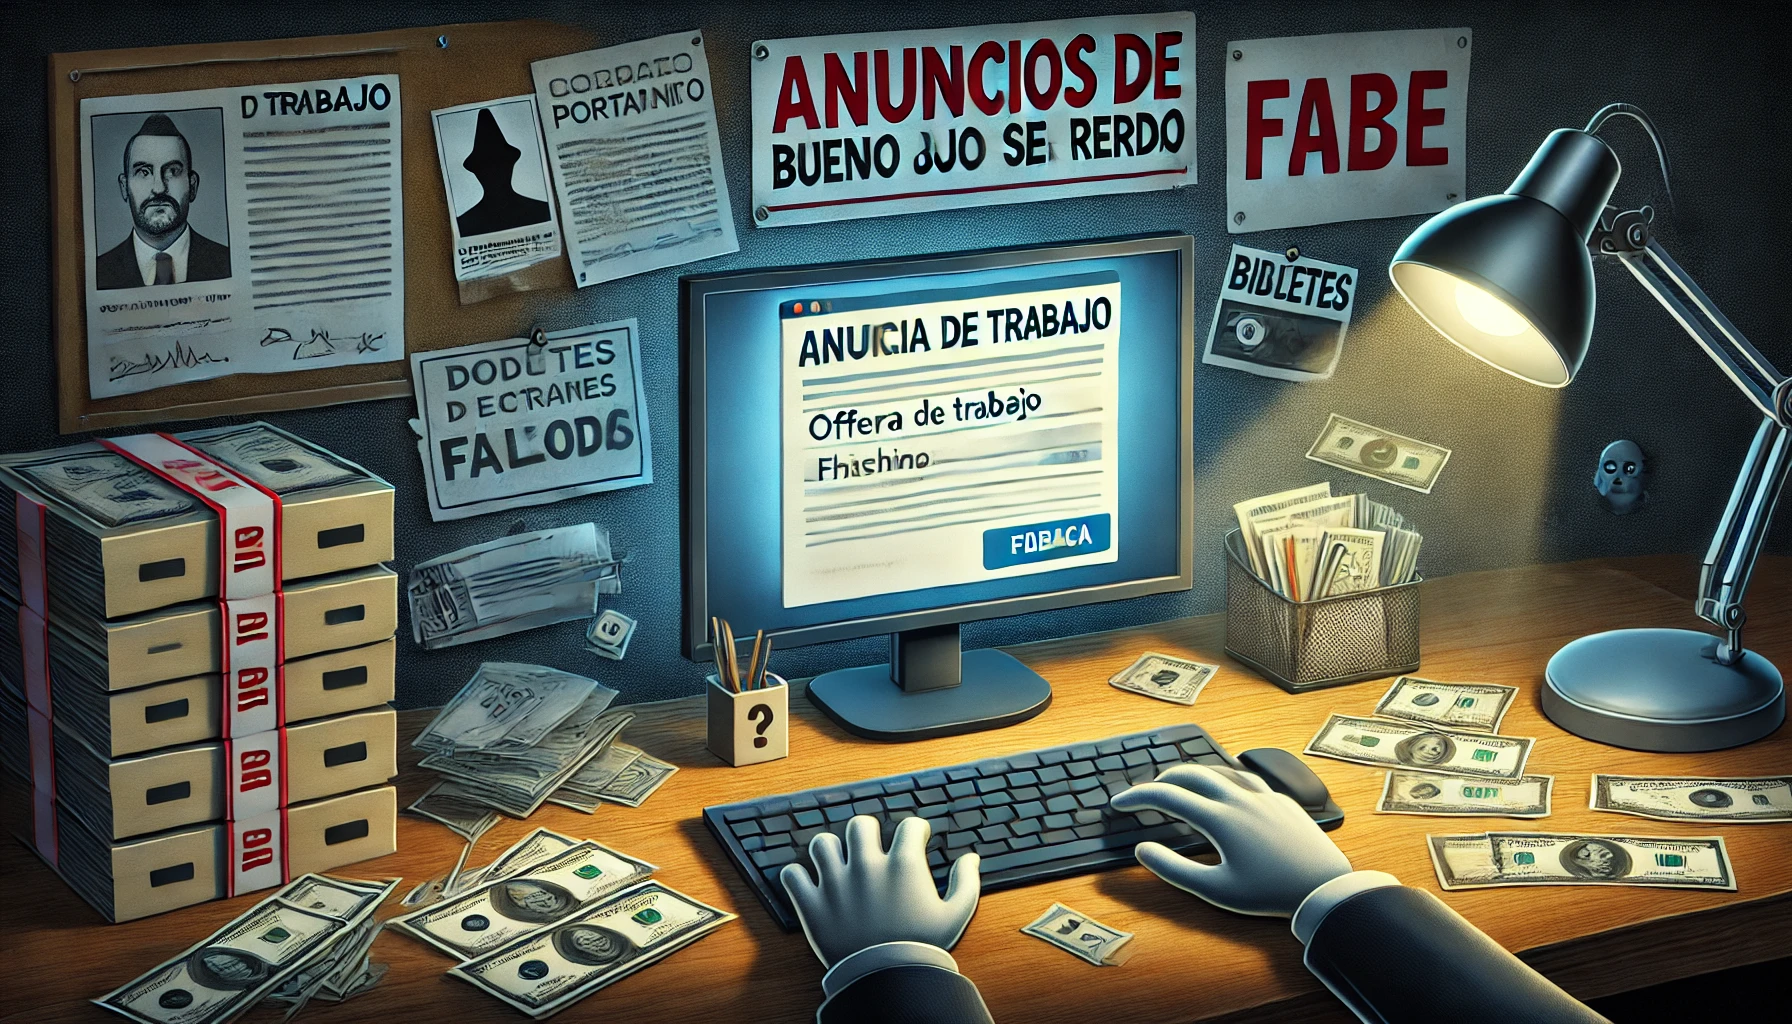

*Esta imagen fue generada por inteligencia artificial.*

*Este conjunto de datos proviene de la Universidad del Egeo, específicamente del Laboratorio de Seguridad de Sistemas de Información y Comunicaciones. Se ha publicado en Kaggle, lo que garantiza su accesibilidad y reutilización en la comunidad de datos.*

In [1]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance

########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
#cargo el dataset
file_path = '/Users/davidravelli/AI2024/fake_job_postings.csv'
# '/Users/davidravelli/AI2024/fake_job_postings.csv'
#'C:/Users/lucar/Desktop/AI/progetto 3/fake_job_postings.csv'

df = pd.read_csv(file_path)

#hago una copia del database original

original = df.copy()

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
print(df)

       job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2           

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [11]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


## Técnicas pre-modelo: Analisis y visualización de datos

### Análisis Univariante

In [15]:
text_df = df[["title", "company_profile", "description", "requirements", "benefits"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,benefits
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


In [17]:
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna('')

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,,,Marketing,0
1,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,0,1,0,,,,,,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


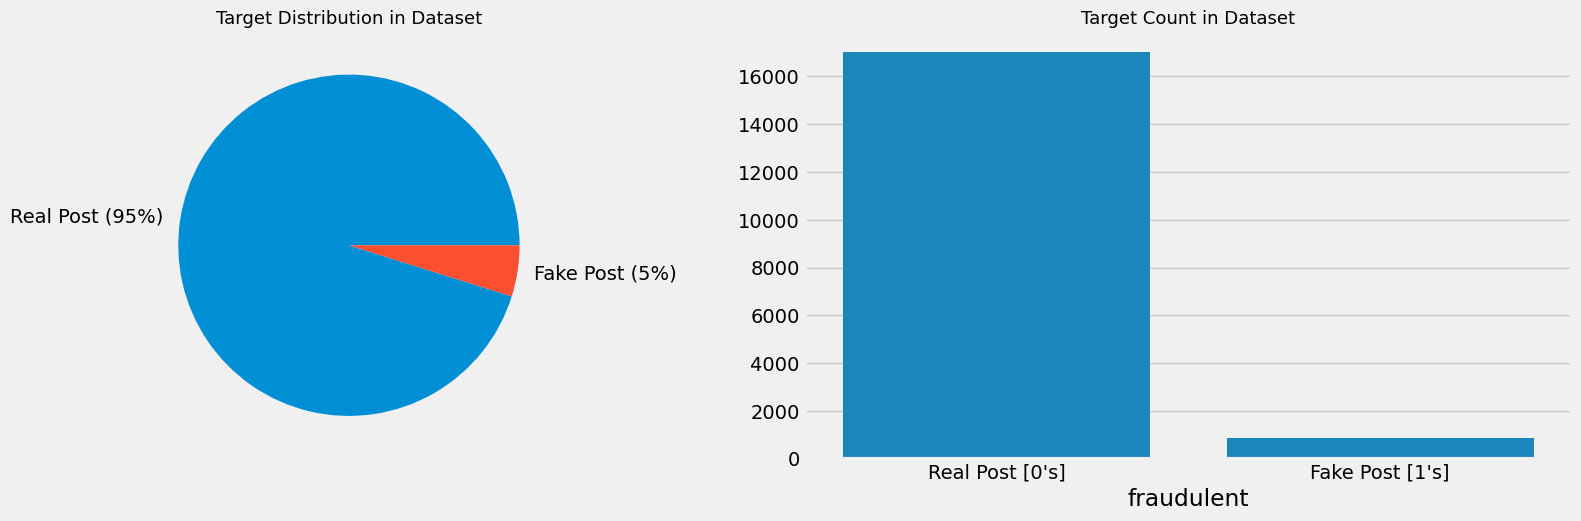

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(x=temp.index, y=temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post [0's]", "Fake Post [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

Como se puede ver, este problema tiene una distribución de clases desequilibrada: entonces, las métricas como precisión, recall y F1-Score son mucho más útiles que la precisión general. Ayudan a entender mejor cómo el modelo maneja la clase minoritaria (que suele ser la más importante, como en este caso la detección de fraudes).

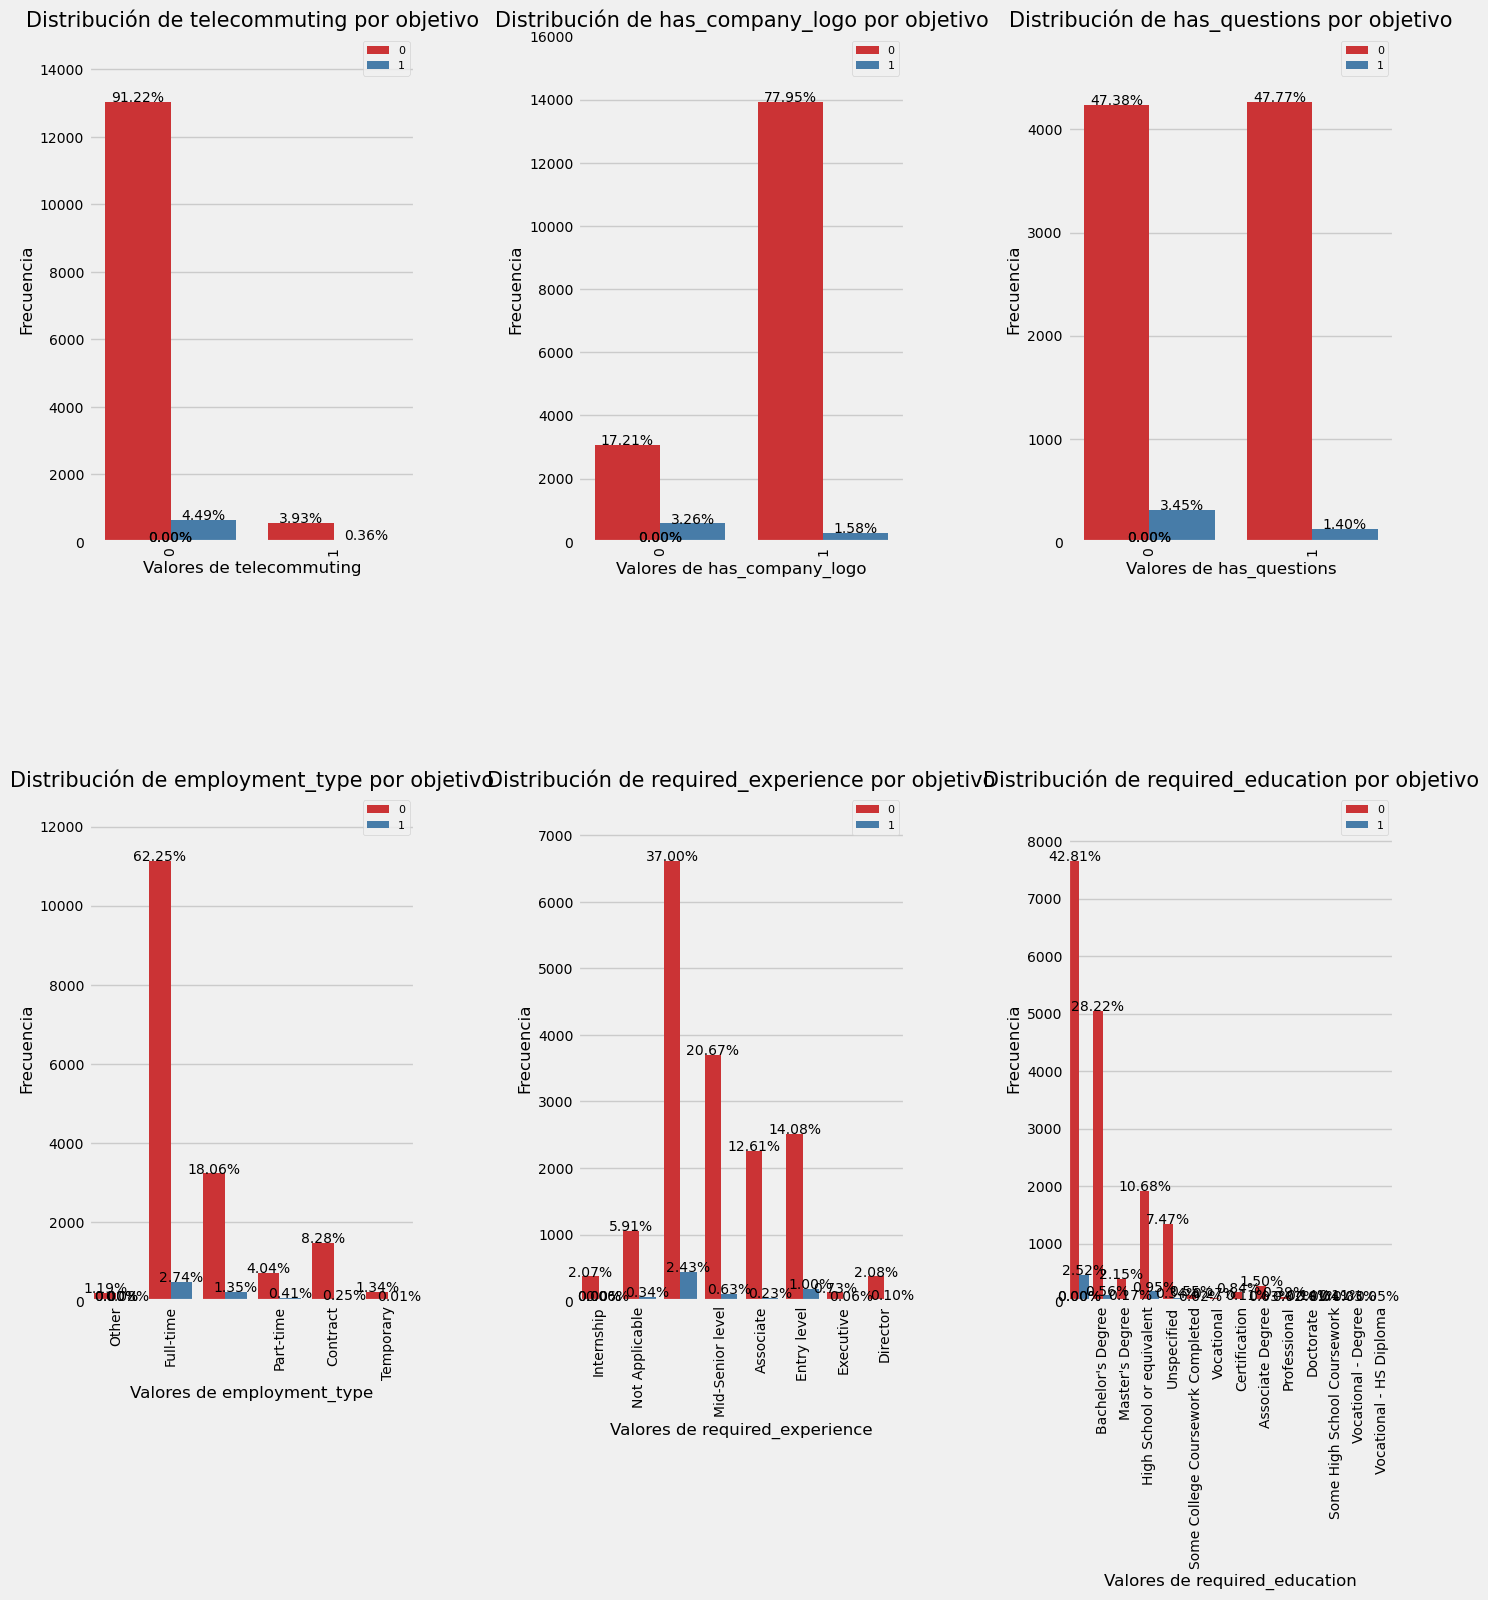

In [22]:
cat_cols = [
    "telecommuting", 
    "has_company_logo", 
    "has_questions", 
    "employment_type", 
    "required_experience", 
    "required_education"
]

grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15, 25))

for n, col in enumerate(cat_df[cat_cols]): 
    ax = plt.subplot(grid[n])
    sns.countplot(x=col, data=cat_df, hue='fraudulent', palette='Set1')
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.set_title(f'Distribución de {col} por objetivo', fontsize=15)
    ax.set_xlabel(f'Valores de {col}', fontsize=12)

    xlabels = ax.get_xticklabels()
    ylabels = ax.get_yticklabels()
    ax.set_xticklabels(xlabels, fontsize=10)
    ax.set_yticklabels(ylabels, fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90)

    total = len(cat_df)
    sizes = []
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width() / 2., 
                height + 3, 
                '{:1.2f}%'.format(height / total * 100),
                ha="center", fontsize=10)
    ax.set_ylim(0, max(sizes) * 1.15)

plt.show()

Como se puede observar en los gráficos, el conjunto de datos está muy desequilibrado, con un 95% de anuncios no fraudulentos. Por esta razón, será necesario enfocarse en los valores de precisión, recall y F1 específicos para la clase minoritaria, en lugar de los valores generales, para evitar un análisis inexacto.

### Análisis Multivariante

In [26]:
jobs = df.dropna()

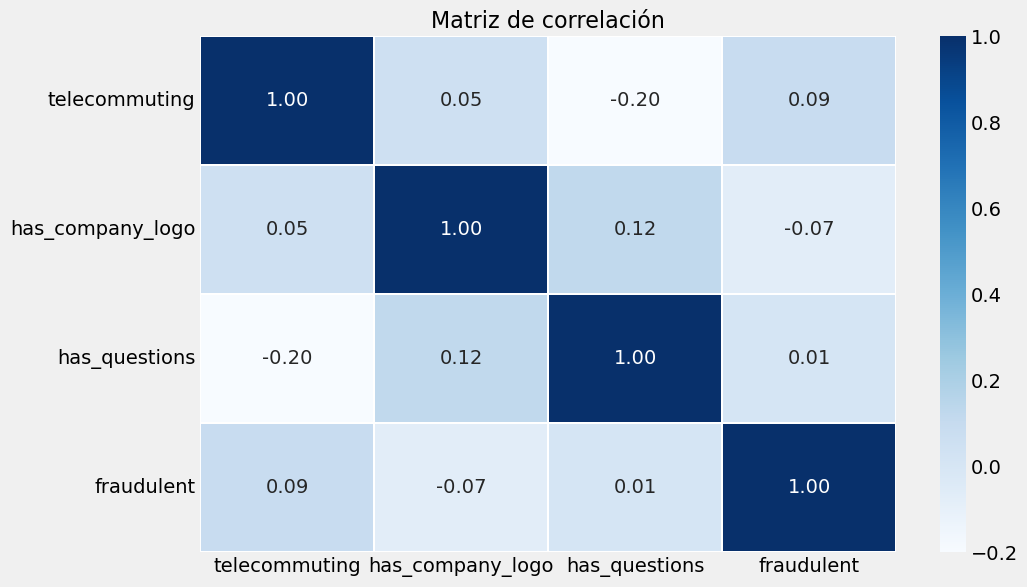

In [28]:
numeric_jobs = jobs.select_dtypes(include=['number']).drop(columns=['job_id'])

f, ax = plt.subplots(figsize=(10, 6))
corr = numeric_jobs.corr()
hm = sns.heatmap(
    round(corr, 2), 
    annot=True, 
    ax=ax, 
    cmap="Blues", 
    fmt='.2f',
    linewidths=.05
)
f.subplots_adjust(top=0.93)
plt.title("Matriz de correlación", fontsize=16)
plt.show()

## Contexto

El análisis se centra en un conjunto de datos de anuncios de trabajo, con el objetivo de determinar si cada anuncio es **fraudulento** o **no fraudulento**. Uno de los principales desafíos es que los datos están altamente desbalanceados, con aproximadamente un **95% de ejemplos no fraudulentos** y solo un **5% de ejemplos fraudulentos**, según los gráficos exploratorios iniciales.

## Problema a Resolver

Dada la distribución desbalanceada de las clases, el modelo puede presentar una fuerte tendencia a predecir la clase mayoritaria ("no fraudulento"). Esto podría reducir significativamente la capacidad del modelo para identificar anuncios fraudulentos, afectando el rendimiento general y aumentando el riesgo de pasar por alto casos importantes.

## Estrategia Seguida

Para abordar este desafío, hemos empleado:  
1. **SMOTETomek**, que combina:  
   - **SMOTE** (*Synthetic Minority Over-sampling Technique*) para generar ejemplos sintéticos de la clase minoritaria.  
   - **Tomek Links** para eliminar instancias ruidosas y mejorar la separación entre clases.  
2. **TF-IDF Vectorizer**, aplicado a columnas de texto, para extraer características significativas de los datos textuales.  
3. **Label Encoding**, usado en columnas categóricas, para convertir valores de texto en representaciones numéricas.

Estas técnicas han permitido un preprocesamiento más robusto, equilibrando los datos y mejorando la calidad de las entradas para el modelo.

## Algoritmos (y Librerías) Empleados para la Solución del Problema

Se han utilizado diversos algoritmos de Machine Learning, incluyendo:  
- **Regresión Logística** y **Regresión Lineal** como líneas base.  
- **Árboles de Decisión** y **Random Forest** para modelos interpretables y robustos.  
- **K-Nearest Neighbors (KNN)** para análisis basado en la proximidad entre instancias.  
- **XGBoost**, un modelo avanzado de boosting para mejorar el rendimiento.
- **Redes Neuronales**, un modelo avanzado de boosting para mejorar el rendimiento.  

Principales librerías empleadas:  
- **scikit-learn**: para preprocesamiento y modelado.  
- **imbalanced-learn**: para técnicas de balanceo como SMOTETomek.  
- **XGBoost**: para la implementación del algoritmo de boosting.  

## Objetivos Esperados

- Construir un modelo que logre predecir casos fraudulentos con **alta precisión y recall**, a pesar del desbalanceo.  
- Utilizar técnicas de preprocesamiento como **TF-IDF** para mejorar la calidad de las entradas textuales.  
- Minimizar los efectos adversos del desbalanceo de clases a través de **SMOTETomek**.  
- Evaluar los resultados del modelo con métricas clave como **precisión**, **recall** y **AUC-ROC** para una comprensión integral del rendimiento.

El objetivo final es desarrollar un modelo que no solo alcance un buen rendimiento general, sino que también sea efectivo en identificar casos de fraude, equilibrando el impacto del desbalanceo en los resultados.cto del desbalanceo en los resultados.


## Transformación y Preparación de Variables para ML

In [32]:
jobs_log = jobs.copy()

jobs_log.drop_duplicates()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0


In [34]:
#divido salary range en 2 variables int64s
jobs_log[['salary_range_min', 'salary_range_max']] = jobs_log['salary_range'].str.split('-', expand=True)

jobs_log['salary_range_min'] = pd.to_numeric(jobs_log['salary_range_min'], errors='coerce')
jobs_log['salary_range_max'] = pd.to_numeric(jobs_log['salary_range_max'], errors='coerce')

jobs_log = jobs_log.drop(columns=['salary_range'])

jobs_log.dtypes

job_id                  int64
title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
salary_range_min        int64
salary_range_max        int64
dtype: object

In [36]:
jobs_log[['salary_range_min', 'salary_range_max']].head()

,salary_range_min,salary_range_max
6,20000,28000
15,120000,150000
23,100000,120000
98,95000,115000
102,15000,18000


Divido el salary_range en dos columnas: salary_range_min y salary_range_max, ambos de tipo int64

In [39]:
jobs_log.drop_duplicates(subset=['title'], inplace=True)
jobs_log.drop_duplicates(subset=['description'], inplace=True)
jobs_log.drop_duplicates(subset=['requirements'], inplace=True)
jobs_log.drop_duplicates(subset=['benefits'], inplace=True)

Eliminación de duplicados para variables de tipo cadena (string) que no pueden ser codificadas con label encoding.

### Label Encoding con Scikit-learn

El *Label Encoding* es una técnica que convierte valores categóricos (cadenas de texto) en números. Esto es útil porque muchos algoritmos de aprendizaje automático solo trabajan con datos numéricos.

Con **scikit-learn**, podemos usar la clase `LabelEncoder` para realizar esta transformación fácilmente. Aquí un ejemplo:

```python
from sklearn.preprocessing import LabelEncoder

# Lista de categorías
categorias = ['rojo', 'verde', 'azul', 'rojo', 'verde']

# Crear el codificador
encoder = LabelEncoder()

# Convertir las categorías en números
categorias_codificadas = sform()ias_codificadas)


In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

jobs_log['employment_type_encoded'] = encoder.fit_transform(jobs_log['employment_type'])

jobs_log['required_experience_encoded'] = encoder.fit_transform(jobs_log['required_experience'])

jobs_log['required_education_encoded'] = encoder.fit_transform(jobs_log['required_education'])

jobs_log['industry_encoded'] = encoder.fit_transform(jobs_log['industry'])

jobs_log['function_encoded'] = encoder.fit_transform(jobs_log['function'])

Como datos adicionales, también se han tomado en cuenta las longitudes de las celdas que contienen cadenas de texto que no son aptas para Label Encoding.

In [46]:
jobs_log[['employment_type_encoded', 'required_experience_encoded', 'required_education_encoded', 'industry_encoded', 'function_encoded']].head()

,employment_type_encoded,required_experience_encoded,required_education_encoded,industry_encoded,function_encoded
6,1,5,4,48,19
15,1,3,1,23,30
23,1,3,7,36,30
98,1,5,3,47,22
102,1,2,1,36,21


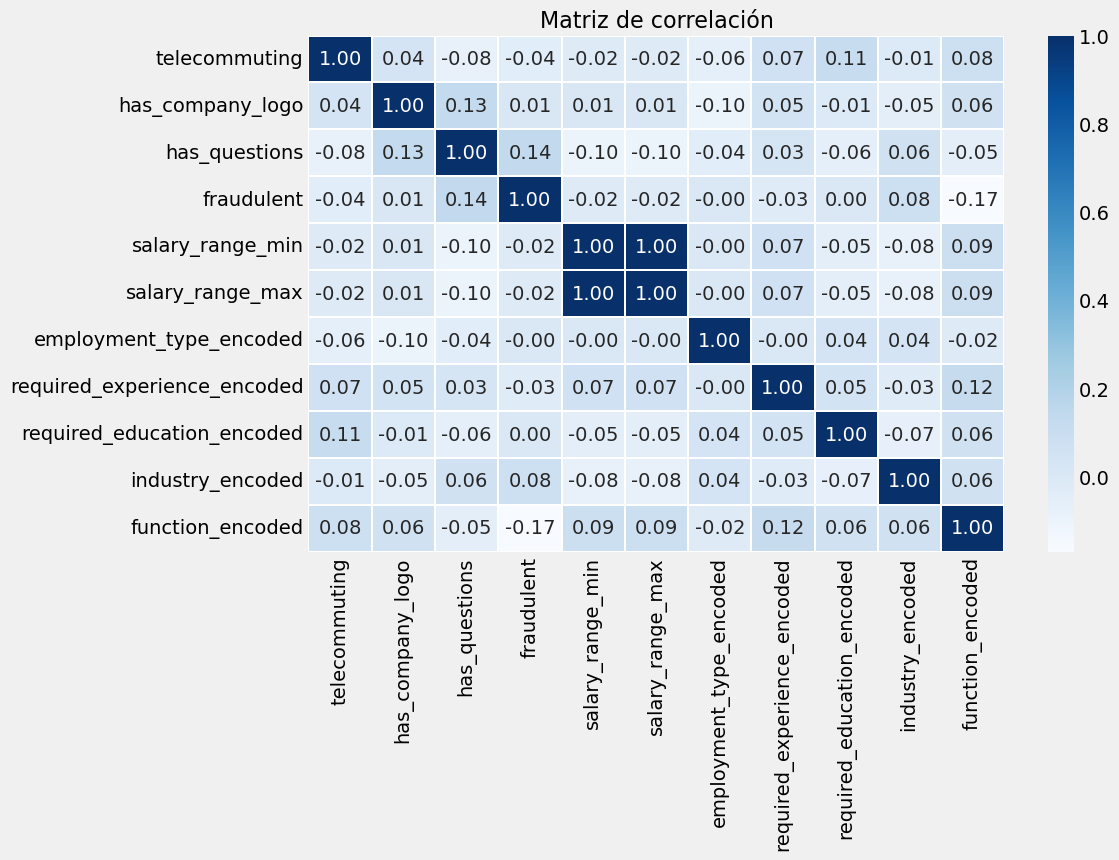

In [48]:
numeric_jobs = jobs_log.select_dtypes(include=['number']).drop(columns=['job_id'])

f, ax = plt.subplots(figsize=(10, 6))
corr = numeric_jobs.corr()  # Calcular correlaciones solo con columnas numéricas
hm = sns.heatmap(
    round(corr, 2), 
    annot=True, 
    ax=ax, 
    cmap="Blues", 
    fmt='.2f',
    linewidths=.05
)
f.subplots_adjust(top=0.93)
plt.title("Matriz de correlación", fontsize=16)
plt.show()

Como se puede observar en la gráfica, las variables salary_range_max y salary_range_min tienen una correlación de 1.0. Por lo tanto, podemos considerar solo una de las dos variables en nuestro análisis para evitar problemas de overfitting.

# Conversión de columnas de strings no codificables a formato numérico


## TF-IDF (Frecuencia de Término - Frecuencia Inversa de Documento)

El **TF-IDF** (Frecuencia de Término - Frecuencia Inversa de Documento) es una técnica que mide la importancia de un término en un documento dentro de un corpus de documentos. Combina dos métricas principales:

### Fórmulas Matemáticas

1. **Frecuencia de Término (TF):** mide cuántas veces aparece un término en un documento en relación con el total de términos de ese documento.

   $$ \text{TF}(t, d) = \frac{\text{Número de veces que el término } t \text{ aparece en el documento } d}{\text{Número total de términos en el documento } d} $$

2. **Frecuencia Inversa de Documento (IDF):** mide la rareza de un término en el conjunto de documentos (corpus).

   $$ \text{IDF}(t) = \log \left( \frac{N}{\text{Número de documentos que contienen el término } t} \right) $$

3. **TF-IDF:** se calcula como el producto de \( TF \) e \( IDF \):

   $$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

### Implementación en Python con Scikit-Learn

La biblioteca `scikit-learn` ofrece la clase `TfidfVectorizer`, que calcula automáticamente el TF, el IDF y su producto \( TF-IDF \) para un conjunto de documentos.

### Función de Scikit-Learn:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicialización del vectorizador
vectorizador = TfidfVectorizer()

# Transformación del corpus
tfidf_matrix = vectorizador.fit_transform(corpus)


Ejemplo de matriz TF-IDF:

| Documento                             | casa  | duerme | el     | está  | gato  | la    | perro | vacía | y     |
|---------------------------------------|-------|--------|--------|-------|-------|-------|-------|-------|-------|
| **"El gato y el perro"**              | 0.0   | 0.0    | 0.516  | 0.0   | 0.690 | 0.0   | 0.516 | 0.0   | 0.690 |
| **"El perro duerme en la casa"**      | 0.388 | 0.552  | 0.330  | 0.0   | 0.0   | 0.330 | 0.552 | 0.0   | 0.0   |
| **"La casa está vacía"**             | 0.548 | 0.0    | 0.0    | 0.548 | 0.0   | 0.548 | 0.0   | 0.548 | 0.0   |
| **IDF**                               | 1.2   | 1.4    | 0.5    | 1.6   | 1.3   | 1.0   | 1.5   | 2.0   | 1.7   |

### Interpretación

- **Filas:** Cada fila representa un documento.
- **Columnas:** Cada columna representa un término único extraído del corpus.
- **Valores:** Los números en la matriz son los pesos TF-IDF. Un valor alto indica que el término es más importante dentro de ese documento en relación con los demás documentos del corpus.


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [56]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

jobs_log['combined_text'] = jobs_log[text_columns].agg(' '.join, axis=1)

Combina las columnas de texto.

## Modelos de Machine Learning

### Regresión Logistica

### 1. Primera Grafica: sin sistema de mejora de resultados

Realizamos una primera regresión logística sin aplicar ningún sistema de mejora de resultados, como SMOTE.

Precisión: 0.9191176470588235
Matriz de Confusión:
 [[125   0]
 [ 11   0]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       125
           1       0.00      0.00      0.00        11

    accuracy                           0.92       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.84      0.92      0.88       136

AUC-ROC: 0.5236363636363637


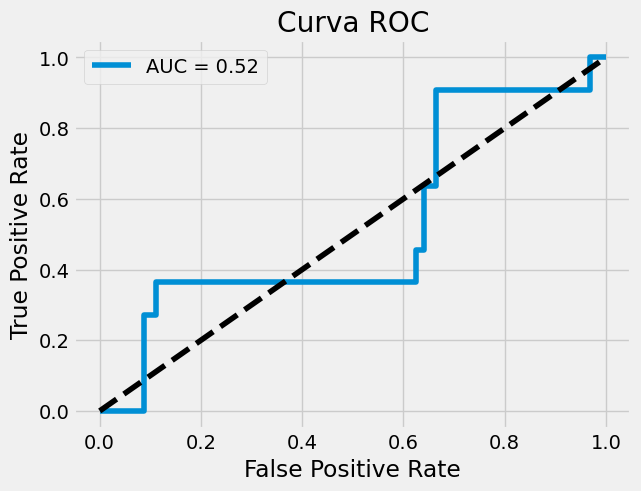

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.show()

El modelo muestra una precisión global del 92%, pero su desempeño está fuertemente influenciado por el desequilibrio del conjunto de datos. La clase 0 se predice correctamente con una precisión perfecta, mientras que la clase 1 no se detecta en absoluto, presentando valores de recall y f1-score iguales a cero. El AUC-ROC de 0.52 confirma que el modelo tiene una capacidad muy limitada para discriminar entre las dos clases.

### 2. Segunda Grafica: SMOTE

Los datos se dividen en conjuntos de entrenamiento y prueba, y se aplica SMOTETomek para balancear las clases en el conjunto de entrenamiento, generando ejemplos sintéticos de la clase minoritaria y eliminando ejemplos ruidosos.

A continuación, se entrena un modelo de regresión logística utilizando los datos balanceados. El modelo realiza predicciones sobre el conjunto de prueba, y se evalúa su rendimiento utilizando métricas como la precisión, la matriz de confusión, el informe de clasificación y la AUC-ROC. Finalmente, se visualiza la curva ROC, que permite evaluar cómo el modelo distingue entre las clases, en este caso, los anuncios fraudulentos y no fraudulentos.

Precisión: 0.75
Matriz de Confusión:
 [[98 27]
 [ 7  4]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       125
           1       0.13      0.36      0.19        11

    accuracy                           0.75       136
   macro avg       0.53      0.57      0.52       136
weighted avg       0.87      0.75      0.80       136

AUC-ROC: 0.5832727272727273


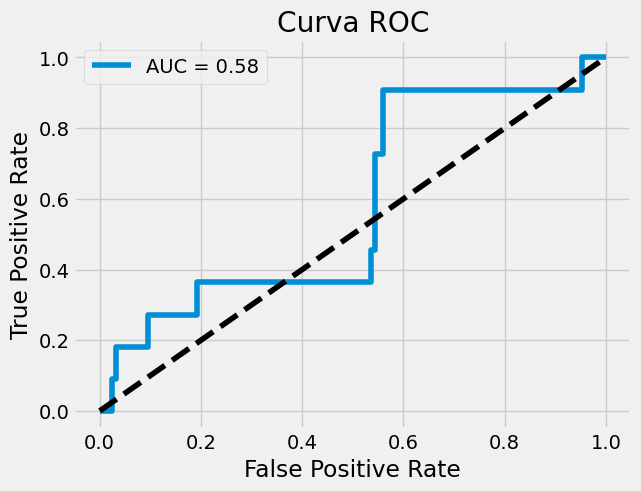

In [58]:
from imblearn.combine import SMOTETomek

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.show()

El modelo muestra una precisión global del 75%, con un buen desempeño en la clase 0 (precisión y recall altos). Sin embargo, la clase 1 tiene un rendimiento muy bajo, con un recall de solo el 36% y una precisión de 13%, lo que sugiere que el modelo tiene dificultades para identificar correctamente los casos de la clase minoritaria. El AUC-ROC de 0.58 refleja una capacidad limitada para discriminar entre las clases.

### 3. Tercera Grafica: SMOTE + undersampling

El undersampling es una técnica usada en regresión logística para manejar el desbalance de clases. Consiste en reducir la cantidad de datos de la clase mayoritaria para que esté más equilibrada con la clase minoritaria. Esto ayuda al modelo a no enfocarse solo en la clase con más ejemplos, mejorando su capacidad para predecir ambas clases. Sin embargo, puede perderse información valiosa al eliminar datos.

Precisión: 0.6617647058823529
Matriz de Confusión:
 [[86 39]
 [ 7  4]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       125
           1       0.09      0.36      0.15        11

    accuracy                           0.66       136
   macro avg       0.51      0.53      0.47       136
weighted avg       0.86      0.66      0.74       136

AUC-ROC: 0.5832727272727273


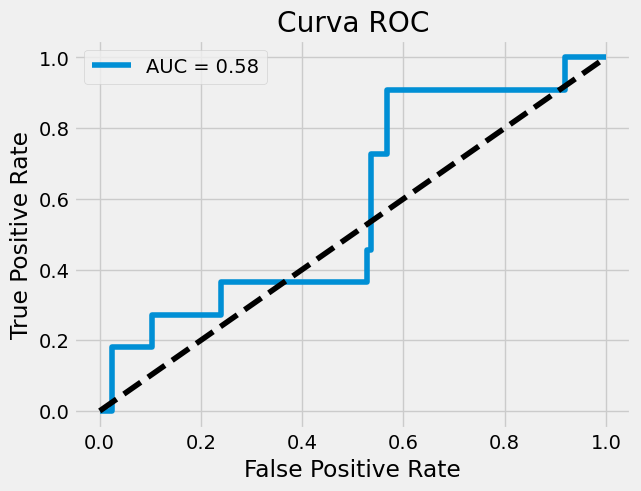

In [64]:
from imblearn.under_sampling import RandomUnderSampler

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Undersampling
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

#Smotetomek
smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_under, y_under)

model = LogisticRegression()
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.show()

El modelo presenta una precisión general del 66%, con un buen rendimiento en la clase 0 (alta precisión y recall), pero un desempeño muy bajo en la clase 1, con un recall del 36% y una precisión de solo 9%. Esto indica que el modelo sigue teniendo dificultades para detectar correctamente los casos de la clase minoritaria. El AUC-ROC de 0.58 refleja una capacidad de discriminación limitada entre las clases.

### 4. Cuarta Grafica: TF-IDF + SMOTETomek

Precisión (Logistic Regression): 0.9411764705882353
Matriz de Confusión (Logistic Regression):
 [[122   3]
 [  5   6]]
Informe de Clasificación (Logistic Regression):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       125
           1       0.67      0.55      0.60        11

    accuracy                           0.94       136
   macro avg       0.81      0.76      0.78       136
weighted avg       0.94      0.94      0.94       136

AUC-ROC (Logistic Regression): 0.888


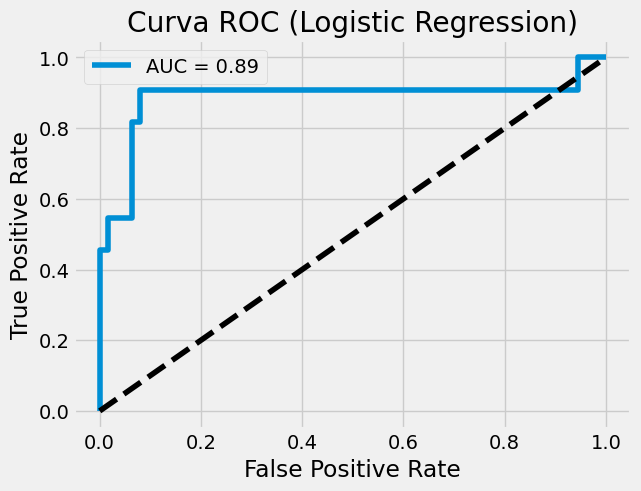

In [71]:
numerical_features = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]

X_text_tfidf = tfidf_vectorizer.fit_transform(jobs_log['combined_text'])

X_combined = hstack([X_text_tfidf, numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_smote, y_smote)

y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

print("Precisión (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Matriz de Confusión (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print("Informe de Clasificación (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("AUC-ROC (Logistic Regression):", roc_auc_score(y_test, y_pred_proba_lr))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_proba_lr)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC (Logistic Regression)")
plt.legend(loc="best")
plt.show()

El modelo de regresión logística muestra una excelente precisión global del 94%, con un desempeño sobresaliente en la clase 0 (alta precisión y recall). En la clase 1, aunque el modelo mejora en comparación con los intentos anteriores, el recall sigue siendo bajo (55%), lo que indica que aún tiene dificultades para identificar correctamente los casos de la clase minoritaria. El AUC-ROC de 0.89 refleja una buena capacidad de discriminación entre las clases.

## Regresión Lineal

Intentamos utilizar la regresión lineal para este problema, pero sabemos que no es la mejor solución, ya que se trata de un problema de clasificación dicotómica. La regresión lineal está diseñada para predecir valores continuos, mientras que en un problema de clasificación necesitamos asignar las observaciones a una de las dos clases. Para adaptar la regresión lineal a este escenario, usamos un valor umbral (0,5) para transformar las predicciones continuas en clasificaciones binarias.

### 1. Primera Grafica: sin sistema de mejoria de resultados

Intercepto (beta_0): 0.1535972872902226
Coeficientes (beta_1): [ 1.78808890e-02 -4.96180298e-03  7.27337781e-02  9.68630271e-11
 -2.91991761e-02 -7.90096251e-03  4.10970144e-03  1.23181212e-03
 -6.70261200e-03]
Precisión: 0.9191176470588235
Matriz de confusión:
 [[125   0]
 [ 11   0]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       125
           1       0.00      0.00      0.00        11

    accuracy                           0.92       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.84      0.92      0.88       136



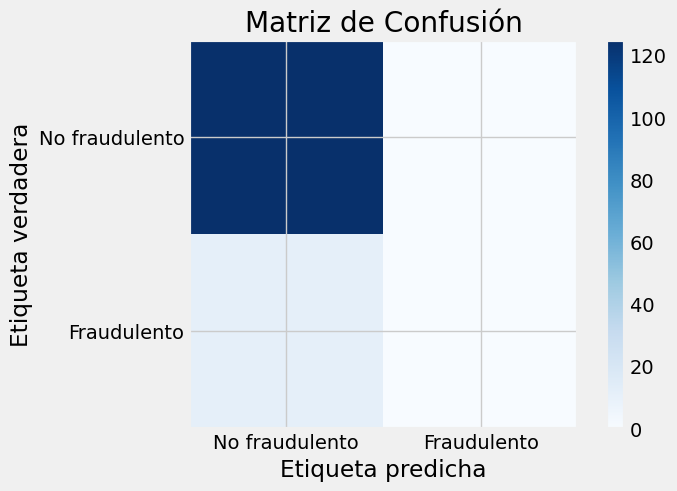

In [78]:
from sklearn.linear_model import LinearRegression

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_continuous = model.predict(X_test)

#umbral 0.5
y_pred = [1 if value >= 0.5 else 0 for value in y_pred_continuous]

print("Intercepto (beta_0):", model.intercept_)
print("Coeficientes (beta_1):", model.coef_)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([0, 1], ['No fraudulento', 'Fraudulento'])
plt.yticks([0, 1], ['No fraudulento', 'Fraudulento'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

El modelo de regresión logística muestra una precisión del 92%, pero, debido al desequilibrio en el conjunto de datos, no logra identificar correctamente los casos de la clase minoritaria. La clase 0 es predicha con alta precisión, pero el modelo no detecta ningún caso de la clase 1, lo que resulta en un recall y f1-score de cero para esta clase. El intercepto (beta_0) y los coeficientes indican que algunas características tienen poca influencia en el modelo, como lo refleja el valor cercano a cero de varios coeficientes.

### 2. Segunda Grafica: SMOTE

Intercepto (beta_0): 1.0697636158189083
Coeficientes (beta_1): [-1.29604201e-01 -3.29356926e-01  1.89138354e-01  2.59965383e-10
 -1.53347533e-01 -3.10158040e-02  9.10904974e-03  4.65713274e-03
 -2.57707492e-02]
Precisión: 0.7720588235294118
Matriz de confusión:
 [[101  24]
 [  7   4]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       125
           1       0.14      0.36      0.21        11

    accuracy                           0.77       136
   macro avg       0.54      0.59      0.54       136
weighted avg       0.87      0.77      0.81       136



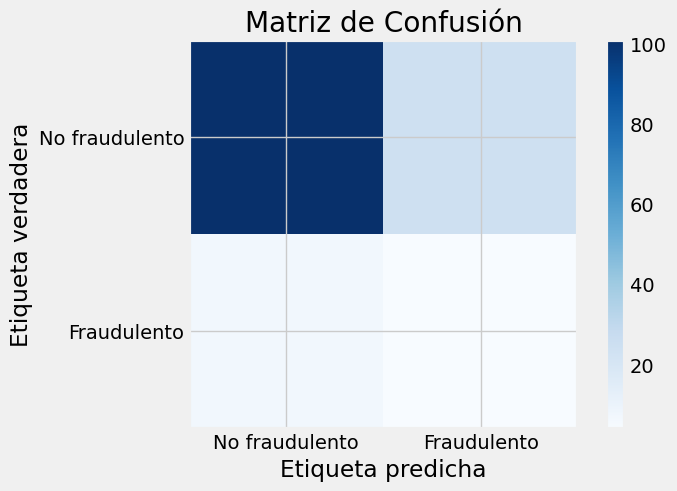

In [81]:
X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

model = LinearRegression()
model.fit(X_smote, y_smote)

y_pred_continuous = model.predict(X_test)

#umbral de 0.5
y_pred = [1 if value >= 0.5 else 0 for value in y_pred_continuous]

print("Intercepto (beta_0):", model.intercept_)
print("Coeficientes (beta_1):", model.coef_)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([0, 1], ['No fraudulento', 'Fraudulento'])
plt.yticks([0, 1], ['No fraudulento', 'Fraudulento'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

El modelo de regresión logística muestra una precisión del 77%, con un buen rendimiento en la clase 0 (alta precisión y recall), pero un desempeño limitado en la clase 1, con un recall de solo 36% y una precisión de 14%. Los coeficientes indican que algunas características tienen un impacto significativo en la predicción, como reflejan los valores absolutos relativamente altos en los coeficientes. Aunque el modelo mejora respecto a las versiones anteriores, sigue siendo insuficiente para detectar eficazmente la clase minoritaria.

## Arból de Decision

Un árbol de decisión es un modelo de aprendizaje automático que se utiliza tanto para clasificación como para regresión. Consiste en una estructura en forma de árbol donde cada nodo interno representa una pregunta o condición sobre una característica del conjunto de datos, y cada rama representa una posible respuesta a esa pregunta. Las hojas del árbol contienen la predicción o la clasificación final. El objetivo del árbol de decisión es dividir los datos en grupos más homogéneos según las características, de modo que las decisiones o predicciones sean lo más precisas posible. Su principal ventaja es que es fácil de interpretar y visualizar, pero puede ser susceptible al sobreajuste si no se controla adecuadamente su profundidad.

### 1. Primera Grafica: sin sistema de mejoria de resultados

Precisión: 0.9411764705882353
Matriz de Confusión:
 [[118   7]
 [  1  10]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       125
           1       0.59      0.91      0.71        11

    accuracy                           0.94       136
   macro avg       0.79      0.93      0.84       136
weighted avg       0.96      0.94      0.95       136



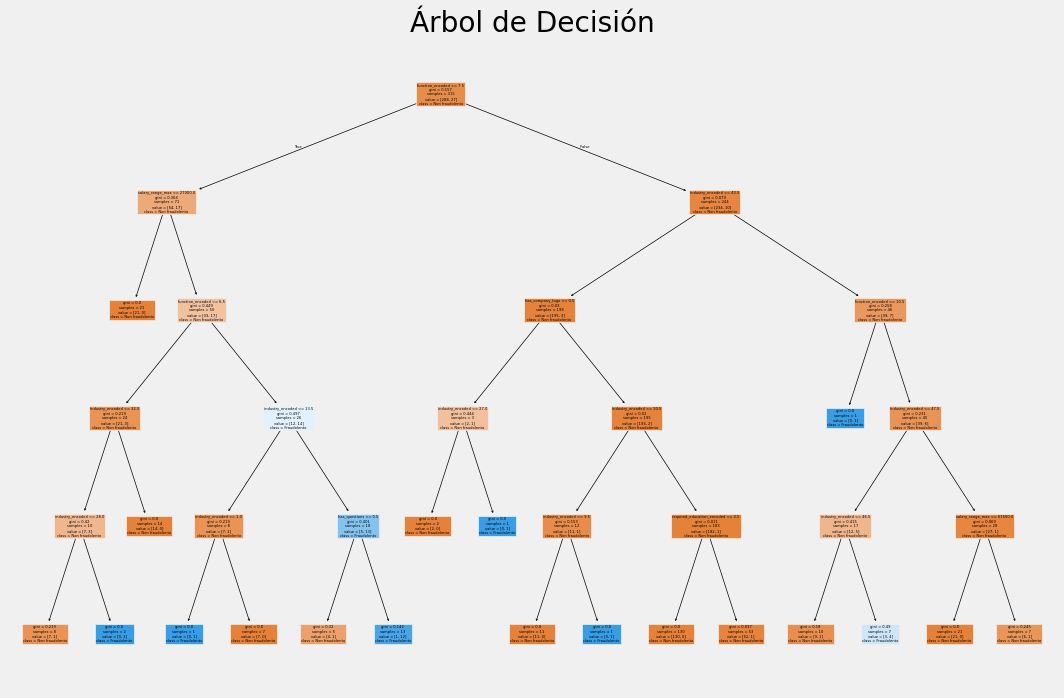

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
], class_names=["Non fraudolento", "Fraudolento"], filled=True)
plt.title("Árbol de Decisión")
plt.show()

El modelo presenta una excelente precisión global del 94%, con un rendimiento sobresaliente en la clase 0 (muy alta precisión y recall). Para la clase 1, aunque la precisión es moderada (59%), el recall es muy alto (91%), lo que indica que el modelo es muy eficaz para identificar los casos de la clase minoritaria. La f1-score de 0.71 para la clase 1 muestra un buen balance entre precisión y recall. En general, el modelo tiene un buen desempeño en ambas clases y una capacidad de discriminación alta.

### 2. Segunda Grafica: SMOTE

Precisión: 0.8602941176470589
Matriz de Confusión:
 [[112  13]
 [  6   5]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       125
           1       0.28      0.45      0.34        11

    accuracy                           0.86       136
   macro avg       0.61      0.68      0.63       136
weighted avg       0.89      0.86      0.88       136



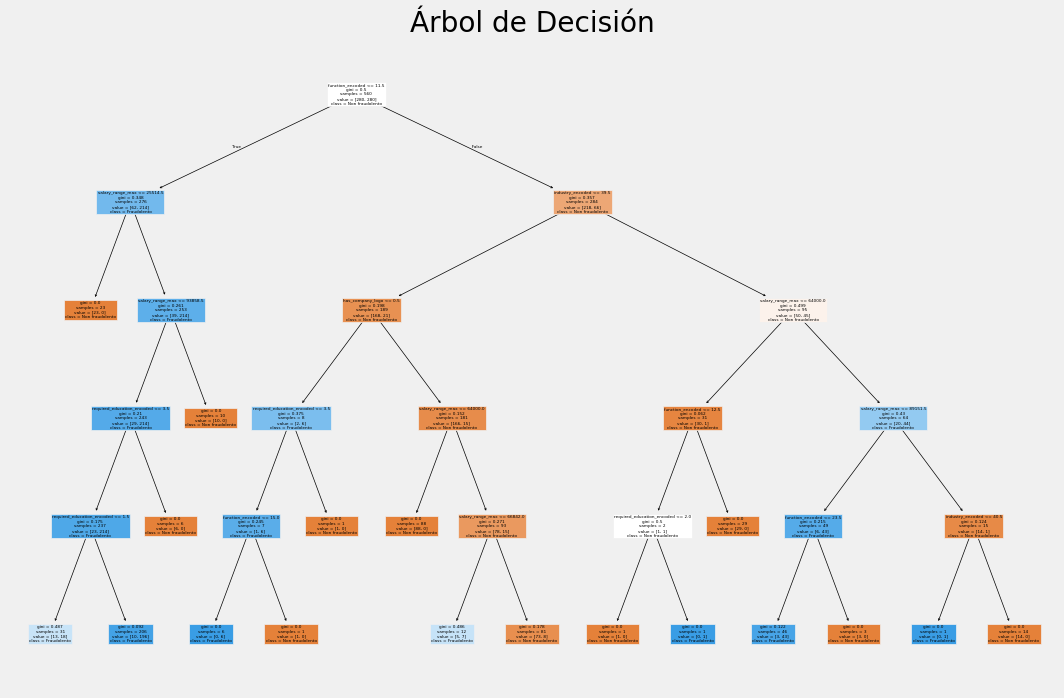

In [96]:
X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
], class_names=["Non fraudolento", "Fraudolento"], filled=True)
plt.title("Árbol de Decisión")
plt.show()

El modelo muestra una precisión global del 86%, con un buen desempeño en la clase 0 (alta precisión y recall). Sin embargo, la clase 1 presenta un desempeño limitado, con una precisión de 28% y un recall de 45%, lo que indica que el modelo tiene dificultades para identificar correctamente los casos de la clase minoritaria. Aunque la precisión total es alta, el modelo necesita mejorar su capacidad para predecir la clase 1.

### 3. Tercera Grafica: TF-IDF + SMOTETomek

Precisión: 0.9191176470588235
Matriz de Confusión:
 [[120   5]
 [  6   5]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       125
           1       0.50      0.45      0.48        11

    accuracy                           0.92       136
   macro avg       0.73      0.71      0.72       136
weighted avg       0.92      0.92      0.92       136



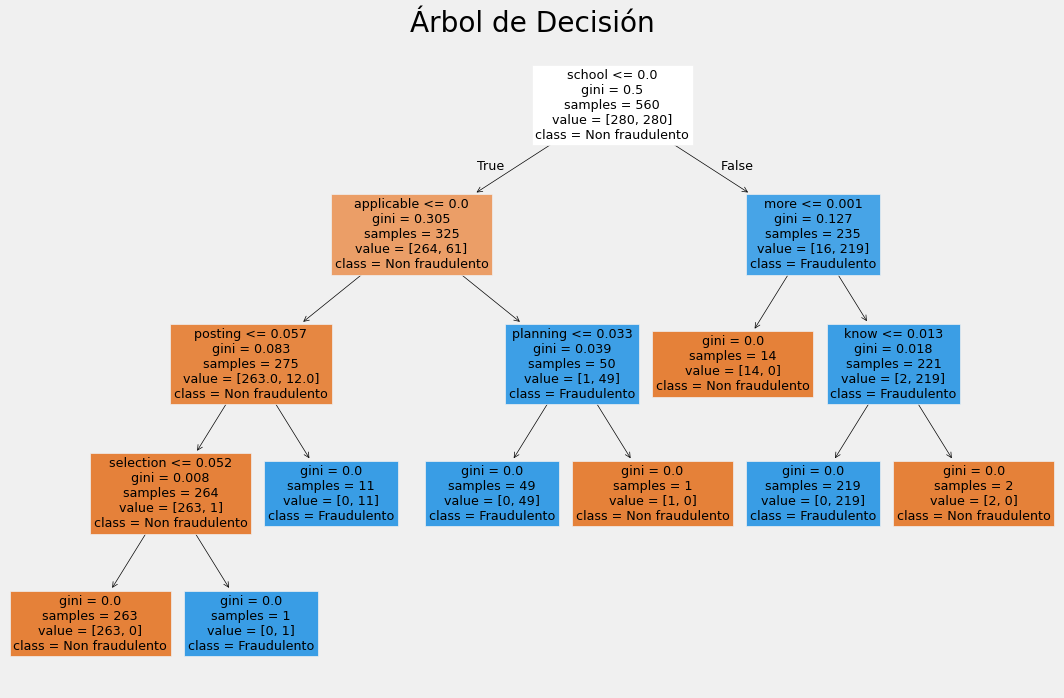

In [100]:
numerical_features = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]

X_text_tfidf = tfidf_vectorizer.fit_transform(jobs_log['combined_text'])

X_combined = hstack([X_text_tfidf, numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=["Non fraudulento", "Fraudulento"], filled=True)
plt.title("Árbol de Decisión")
plt.show()

El modelo presenta una precisión global del 92%, con un buen rendimiento en la clase 0 (alta precisión y recall). Sin embargo, para la clase 1, aunque el recall es moderado (45%), la precisión es solo del 50%, lo que indica que hay algunas predicciones incorrectas para la clase minoritaria. A pesar de estas dificultades, el modelo mantiene un buen desempeño general, con un buen equilibrio en las métricas ponderadas.

## Random Forest

Random Forest es un algoritmo de aprendizaje automático que se basa en la idea de construir múltiples árboles de decisión y luego combinar sus resultados. Cada árbol de decisión hace una predicción, y la predicción final del modelo es el promedio o la votación de todos los árboles.

La clave de Random Forest es la aleatoriedad: cada árbol se entrena con una muestra diferente de los datos (mediante un proceso llamado “bootstrap”), y además, cuando se divide un nodo en cada árbol, solo se considera un subconjunto aleatorio de las características disponibles. Esto ayuda a que los árboles sean menos similares entre sí, lo que mejora la precisión y reduce el riesgo de sobreajuste.

### 1. Primera Grafica: sin sistema de mejoria de resultados

In [104]:
from sklearn.ensemble import RandomForestClassifier

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred, target_names=["No fraudulento", "Fraudulento"]))

Precisión del modelo: 0.9191176470588235
Matriz de Confusión:
 [[125   0]
 [ 11   0]]
Informe de Clasificación:
                 precision    recall  f1-score   support

No fraudulento       0.92      1.00      0.96       125
   Fraudulento       0.00      0.00      0.00        11

      accuracy                           0.92       136
     macro avg       0.46      0.50      0.48       136
  weighted avg       0.84      0.92      0.88       136



El modelo muestra una precisión del 92%, pero su desempeño es fuertemente sesgado hacia la clase "No fraudulento", ya que alcanza un recall perfecto para esta clase. Sin embargo, no logra detectar ningún caso de la clase "Fraudulento", con recall y f1-score de cero. Esto indica que el modelo tiene serias dificultades para predecir la clase minoritaria debido al desequilibrio en el dataset, lo que limita su efectividad en la identificación de fraudes.

### 2. Segunda Grafica: SMOTETomek

In [108]:
X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
random_forest.fit(X_smote, y_smote)

y_pred = random_forest.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred, target_names=["No fraudulento", "Fraudulento"]))

Precisión del modelo: 0.9117647058823529
Matriz de Confusión:
 [[119   6]
 [  6   5]]
Informe de Clasificación:
                 precision    recall  f1-score   support

No fraudulento       0.95      0.95      0.95       125
   Fraudulento       0.45      0.45      0.45        11

      accuracy                           0.91       136
     macro avg       0.70      0.70      0.70       136
  weighted avg       0.91      0.91      0.91       136



El modelo presenta una precisión del 91%, con un buen rendimiento en la clase "No fraudulento", con una alta precisión y recall. Sin embargo, en la clase "Fraudulento", aunque el modelo logra un recall del 45%, la precisión sigue siendo baja (45%), lo que indica que aún tiene dificultades para identificar correctamente los fraudes. A pesar de esto, el modelo muestra un buen desempeño general con un buen equilibrio en las métricas ponderadas.

### 3. Tercera Grafica: TF-IDF + SMOTEtomek

In [111]:
numerical_features = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]

X_text_tfidf = tfidf_vectorizer.fit_transform(jobs_log['combined_text'])

X_combined = hstack([X_text_tfidf, numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
random_forest.fit(X_smote, y_smote)

y_pred = random_forest.predict(X_test)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.9485294117647058
Matriz de Confusión:
 [[125   0]
 [  7   4]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       125
           1       1.00      0.36      0.53        11

    accuracy                           0.95       136
   macro avg       0.97      0.68      0.75       136
weighted avg       0.95      0.95      0.94       136



El modelo muestra una precisión global excelente del 95%, con un rendimiento perfecto en la clase "No fraudulento" (alta precisión y recall). Para la clase "Fraudulento", la precisión es perfecta (100%), pero el recall es bajo (36%), lo que indica que aunque el modelo identifica correctamente algunos fraudes, tiene dificultades para detectar la mayoría de los casos de la clase minoritaria. A pesar de esto, el modelo sigue siendo muy efectivo en general, con un buen equilibrio en las métricas ponderadas.

## K-nearest

El algoritmo **K-Nearest Neighbors (KNN)** clasifica un punto basándose en la mayoría de las clases de sus **k vecinos más cercanos** en el espacio de características. La cercanía entre los puntos se mide comúnmente usando métricas como la **distancia euclidiana**. KNN es un método **no paramétrico** y **basado en instancia**, lo que significa que no realiza un aprendizaje explícito, sino que almacena los datos de entrenamiento para calcular la proximidad en cada predicción. El valor de **k** es crucial: valores pequeños pueden provocar sobreajuste, mientras que valores grandes pueden suavizar demasiado los resultados.  

### 1. Primera Grafica: sin sistema de mejora de los resultados

El mejor valor de k es: 3


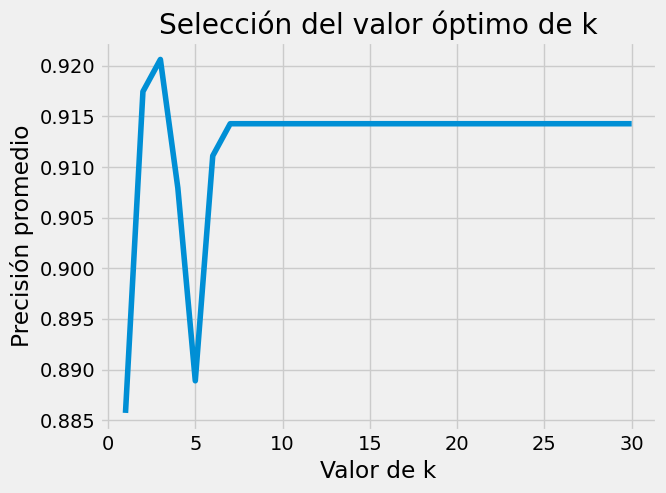

Precisión del modelo con k=3: 0.88

Matriz de Confusión:
[[116   9]
 [  8   3]]

Informe de Clasificación:
                precision    recall  f1-score   support

No fraudulento       0.94      0.93      0.93       125
   Fraudulento       0.25      0.27      0.26        11

      accuracy                           0.88       136
     macro avg       0.59      0.60      0.60       136
  weighted avg       0.88      0.88      0.88       136



In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"El mejor valor de k es: {best_k}")

plt.plot(k_values, cv_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Selección del valor óptimo de k')
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"Precisión del modelo con k={best_k}: {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No fraudulento", "Fraudulento"]))

El modelo con k=3 muestra una precisión global del 88%, con un buen desempeño en la clase "No fraudulento" (alta precisión y recall). Sin embargo, para la clase "Fraudulento", la precisión es baja (25%) y el recall también es limitado (27%), lo que indica que el modelo tiene dificultades significativas para identificar correctamente los fraudes. Aunque la precisión global es alta, el rendimiento en la clase minoritaria sigue siendo una área de mejora.

### 2. Segunda Grafica: SMOTETomek

El mejor valor de k es: 1


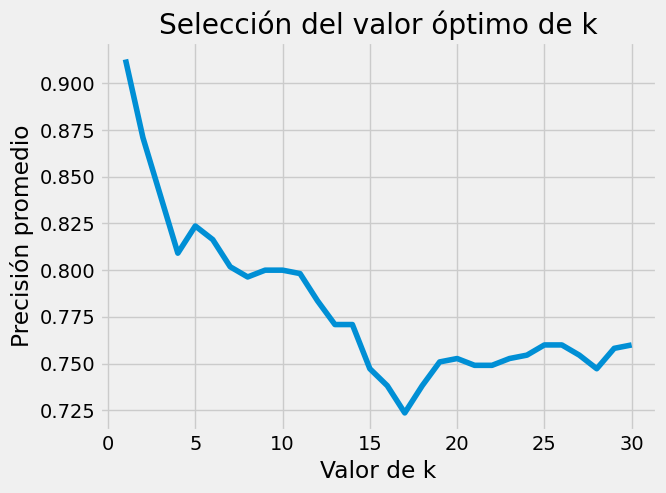

Precisión del modelo con k=1: 0.82

Matriz de Confusión:
[[108  17]
 [  7   4]]

Informe de Clasificación:
                precision    recall  f1-score   support

No fraudulento       0.94      0.86      0.90       125
   Fraudulento       0.19      0.36      0.25        11

      accuracy                           0.82       136
     macro avg       0.56      0.61      0.57       136
  weighted avg       0.88      0.82      0.85       136



In [124]:
X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_smote, y_smote, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"El mejor valor de k es: {best_k}")

plt.plot(k_values, cv_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Selección del valor óptimo de k')
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_smote, y_smote)

y_pred = knn.predict(X_test)

print(f"Precisión del modelo con k={best_k}: {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No fraudulento", "Fraudulento"]))

El modelo con k=1 tiene una precisión global del 82%, con un buen rendimiento en la clase "No fraudulento" (alta precisión y recall). Sin embargo, en la clase "Fraudulento", la precisión es baja (19%) y el recall es moderado (36%), lo que indica que el modelo tiene dificultades para identificar correctamente los fraudes. Aunque la precisión global es razonable, el rendimiento en la clase minoritaria sigue siendo un desafío.

### 3. Tercera Grafica: TF-IDF + SMOTEtomek

El mejor valor de k es: 1


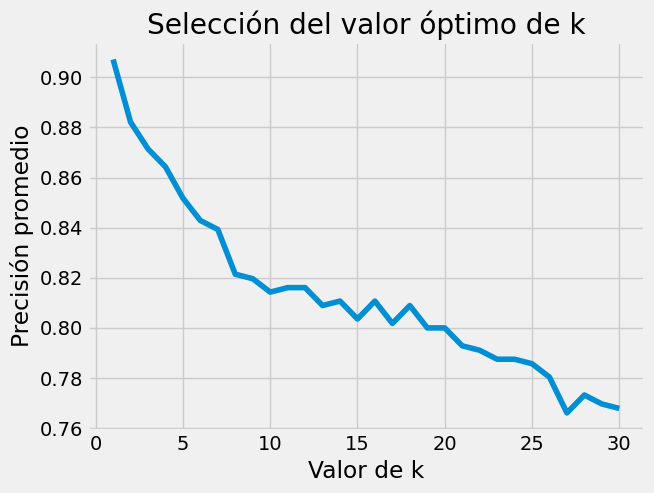

Precisión del modelo con k=1: 0.87

Matriz de Confusión:
[[115  10]
 [  8   3]]

Informe de Clasificación:
                precision    recall  f1-score   support

No fraudulento       0.93      0.92      0.93       125
   Fraudulento       0.23      0.27      0.25        11

      accuracy                           0.87       136
     macro avg       0.58      0.60      0.59       136
  weighted avg       0.88      0.87      0.87       136



In [127]:
numerical_features = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]

X_text_tfidf = tfidf_vectorizer.fit_transform(jobs_log['combined_text'])

X_combined = hstack([X_text_tfidf, numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_smote, y_smote, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"El mejor valor de k es: {best_k}")

plt.plot(k_values, cv_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Selección del valor óptimo de k')
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_smote, y_smote)

y_pred = knn.predict(X_test)

print(f"Precisión del modelo con k={best_k}: {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No fraudulento", "Fraudulento"]))

El modelo con k=1 tiene una precisión global del 87%, con un buen desempeño en la clase "No fraudulento" (alta precisión y recall). Sin embargo, para la clase "Fraudulento", la precisión sigue siendo baja (23%) y el recall es moderado (27%), lo que indica que el modelo tiene dificultades para identificar correctamente los casos de fraude. Aunque la precisión global es bastante alta, la capacidad de detección de la clase minoritaria sigue siendo limitada.

## XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza el enfoque de boosting para mejorar la precisión del modelo. En boosting, los modelos se entrenan secuencialmente, donde cada nuevo modelo corrige los errores del anterior. XGBoost es conocido por su eficiencia y capacidad para manejar grandes volúmenes de datos, ser resistente al sobreajuste y ofrecer un rendimiento superior en tareas de clasificación y regresión. Es muy popular debido a su velocidad, capacidad de generalización y facilidad de uso en competiciones de ciencia de datos.

### 1. Primera Grafica: sin sistema de mejora de los resultados

Precisione del modello: 0.9558823529411765
Matrice di confusione:
 [[125   0]
 [  6   5]]
Rapporto di classificazione:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       125
           1       1.00      0.45      0.62        11

    accuracy                           0.96       136
   macro avg       0.98      0.73      0.80       136
weighted avg       0.96      0.96      0.95       136



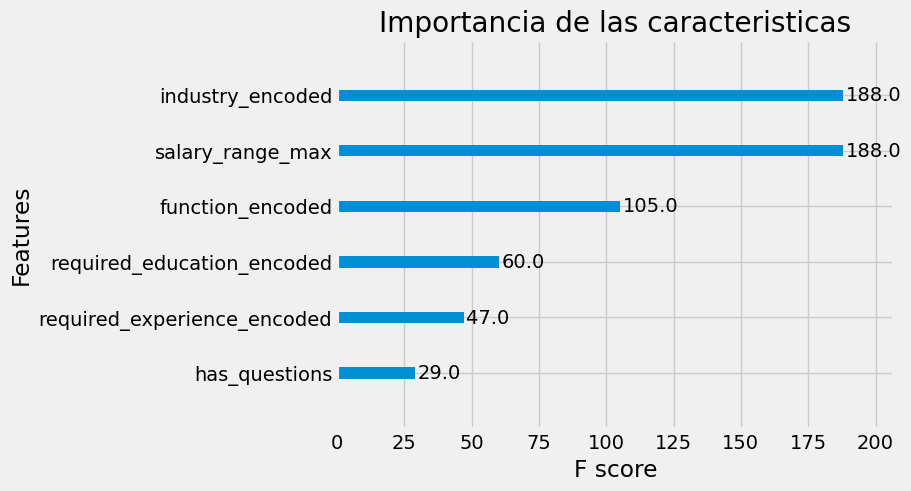

In [132]:
import xgboost as xgb

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

print("Precisione del modello:", accuracy_score(y_test, y_pred))
print("Matrice di confusione:\n", confusion_matrix(y_test, y_pred))
print("Rapporto di classificazione:\n", classification_report(y_test, y_pred))

xgb.plot_importance(xgboost_model, importance_type="weight", max_num_features=10, title="Importancia de las caracteristicas")
plt.show()

El modelo tiene una precisión global del 96%, con un rendimiento excelente para la clase "No fraudulento" (alta precisión y recall). Para la clase "Fraudulento", la precisión es perfecta (100%), pero el recall es solo del 45%, lo que indica que, aunque el modelo identifica correctamente algunos casos de fraude, no logra detectar muchos otros. A pesar de esto, el modelo muestra un buen equilibrio entre las métricas ponderadas y globales, siendo muy eficaz en general.

### 2. Segunda Grafica: SMOTETomek

Precisione del modello: 0.9191176470588235
Matrice di confusione:
 [[118   7]
 [  4   7]]
Rapporto di classificazione:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       125
           1       0.50      0.64      0.56        11

    accuracy                           0.92       136
   macro avg       0.73      0.79      0.76       136
weighted avg       0.93      0.92      0.92       136



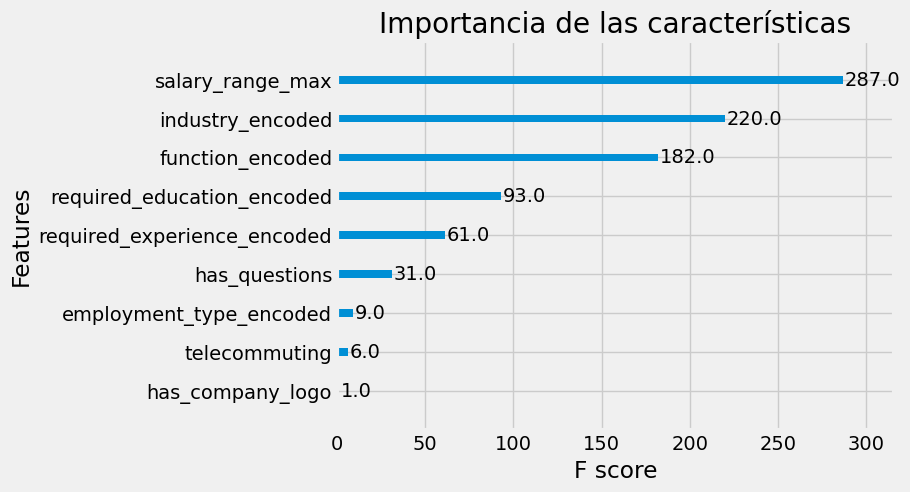

In [135]:
X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgboost_model.fit(X_smote, y_smote)

y_pred = xgboost_model.predict(X_test)

print("Precisione del modello:", accuracy_score(y_test, y_pred))
print("Matrice di confusione:\n", confusion_matrix(y_test, y_pred))
print("Rapporto di classificazione:\n", classification_report(y_test, y_pred))

xgb.plot_importance(xgboost_model, importance_type="weight", max_num_features=10, title="Importancia de las características")
plt.show()

El modelo tiene una precisión del 92%, con un excelente rendimiento en la clase "No fraudulento" (alta precisión y recall). Para la clase "Fraudulento", el modelo logra un recall del 64%, pero la precisión es más baja (50%), lo que indica que, aunque identifica correctamente una parte de los casos de fraude, también realiza algunas predicciones incorrectas. En general, el modelo tiene un buen desempeño, con un buen equilibrio entre precisión y recall para ambas clases.

### 3. Tercera Grafica: TF-IDF + SMOTETomek

Precisione del modello: 0.9779411764705882
Matrice di confusione:
 [[125   0]
 [  3   8]]
Rapporto di classificazione:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.73      0.84        11

    accuracy                           0.98       136
   macro avg       0.99      0.86      0.92       136
weighted avg       0.98      0.98      0.98       136



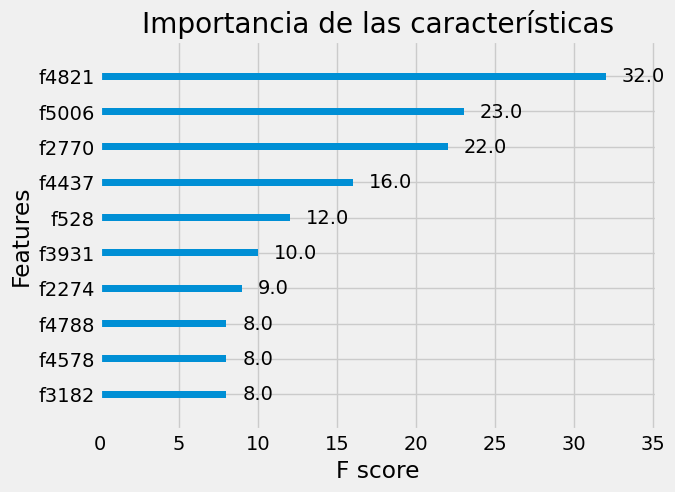

In [138]:
numerical_features = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]

X_text_tfidf = tfidf_vectorizer.fit_transform(jobs_log['combined_text'])

X_combined = hstack([X_text_tfidf, numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek(random_state=42)
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

xgboost_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgboost_model.fit(X_smote, y_smote)

y_pred = xgboost_model.predict(X_test)

print("Precisione del modello:", accuracy_score(y_test, y_pred))
print("Matrice di confusione:\n", confusion_matrix(y_test, y_pred))
print("Rapporto di classificazione:\n", classification_report(y_test, y_pred))

xgb.plot_importance(xgboost_model, importance_type="weight", max_num_features=10, title="Importancia de las características")
plt.show()

El modelo tiene una excelente precisión del 98%, con un rendimiento sobresaliente en la clase "No fraudulento" (alta precisión y recall). Para la clase "Fraudulento", la precisión es perfecta (100%), y el recall es de 73%, lo que indica que, aunque el modelo logra identificar la mayoría de los fraudes, aún tiene espacio para mejorar en la detección de algunos casos. En general, el modelo muestra un equilibrio muy bueno entre ambas clases, con un rendimiento general muy bueno.

## Redes Neuronales

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

X = jobs_log[[
    "telecommuting", "has_company_logo", "has_questions", 
    "salary_range_max", "employment_type_encoded", 
    "required_experience_encoded", "required_education_encoded", 
    "industry_encoded", "function_encoded"
]]
y = jobs_log["fraudulent"]

y_encoded = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

print("Precisión del modelo:", accuracy_score(y_test_classes, y_pred_classes))
print("Informe de Clasificación:\n", classification_report(y_test_classes, y_pred_classes, target_names=["No fraudulento", "Fraudulento"]))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7543 - loss: 0.5076 - val_accuracy: 0.9048 - val_loss: 0.2777
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9287 - loss: 0.2307 - val_accuracy: 0.9048 - val_loss: 0.2452
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.2057 - val_accuracy: 0.9048 - val_loss: 0.2327
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9020 - loss: 0.2205 - val_accuracy: 0.9048 - val_loss: 0.2324
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - loss: 0.1405 - val_accuracy: 0.9206 - val_loss: 0.2328
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 0.1329 - val_accuracy: 0.9206 - val_loss: 0.2734
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9192 - loss: 0.1580 - val_accuracy: 0.9206 - val_loss: 0.3000
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9619 - loss: 0.0985 - val_accuracy: 0.9206 - val_loss:

El modelo tiene una alta precisión general (0.93), destacándose en la predicción de casos no fraudulentos (precisión 0.97, recall 0.96). Sin embargo, tiene dificultades para predecir fraudes (precisión 0.58, recall 0.64), lo que refleja un bajo desempeño en términos de precisión y un número considerable de falsos positivos. Aunque el modelo logra un buen desempeño global, el desbalance del dataset afecta notablemente la capacidad de predicción de la clase minoritaria, como se observa en la macro media de métricas (f1-score 0.79).

# Conclusiones del Modelo de Machine Learning  

El análisis de los resultados obtenidos en las diferentes configuraciones del modelo de Machine Learning, considerando el alto desbalance del conjunto de datos (**95% de casos en la clase "No fraudulento"**), muestra los siguientes puntos clave:  

En la **regresión logística**, el modelo sin mejoras logra un desempeño decente en la clase mayoritaria, pero es incapaz de detectar casos de fraude. Al aplicar **SMOTE-Tomek**, mejora ligeramente en la detección de fraudes, aunque sigue siendo insuficiente. Con **submuestreo combinado con SMOTE-Tomek**, aumenta el recall para la clase minoritaria, aunque a costa de sacrificar algo de precisión global. Finalmente, al incorporar **TF-IDF con SMOTE-Tomek**, se logra el mejor equilibrio entre precisión y recall para ambas clases, demostrando que este enfoque es el más efectivo.  

En la **regresión lineal**, sin mejoras, los resultados son similares a los de la regresión logística sin ajustes, siendo poco eficaz para detectar fraudes. Al aplicar **SMOTE-Tomek**, hay una ligera mejora, pero sigue siendo menos efectiva en comparación con otros métodos como la regresión logística.  

Para los **árboles de decisión**, el modelo sin mejoras tiene un desempeño razonable en la clase mayoritaria, pero con resultados bajos en la clase "Fraudulento". Con **SMOTE-Tomek**, aumenta el recall de la clase minoritaria, aunque introduce errores en la clase mayoritaria. Cuando se utiliza **TF-IDF con SMOTE-Tomek**, se mejora el balance entre precisión y recall, aunque los árboles muestran limitaciones frente a datasets desbalanceados.  

En **Random Forest**, el rendimiento inicial es similar al de los árboles de decisión, favoreciendo a la clase mayoritaria. Al aplicar **SMOTE-Tomek**, mejora significativamente el recall de la clase minoritaria. La combinación con **TF-IDF y SMOTE-Tomek** proporciona un rendimiento robusto y consistente, logrando un buen equilibrio entre precisión y recall.  

En el caso de **k-Nearest Neighbors (k-NN)**, el modelo sin mejoras se inclina demasiado hacia la clase mayoritaria debido al desbalance. Con **SMOTE-Tomek**, mejora la detección de fraudes, aunque la precisión global sigue siendo baja. Usando **TF-IDF con SMOTE-Tomek**, se observan mejoras respecto al modelo sin balance, pero **k-NN** es menos eficaz en escenarios con desbala
P
Finalmente, para **XGBoost**, el modelo sin mejoras ya muestra un rendimiento aceptable, aunque limitado en la clase minoritaria. Al aplicar **SMOTE-Tomek**, mejora significativamente el recall para la clase "Fraudulento", mostrando que **XGBoost** maneja bien datos balanceados. Con **TF-IDF y SMOTE-Tomek**, se logra el mejor desempeño general, alcanzando un excelente equilibrio entre precis

Al final, para **Redes Neuronales** el model sin mejoras muestra un buen rendimn ##y recall.  

# Conclusión General  
El desbalance extremo en el dataset afecta significativamente el rendimiento de todos los modelos, especialmente en la detección de la clase minoritaria "Fraudulento". Las técnicas de mejora de datos como **SMOTE-Tomek** y la combinación de **TF-IDF con SMOTE-Tomek** son esenciales para mejorar el desempeño en problemas desbalanceados.  

Modelos avanzados como **XGBoost** y **Random Forest** muestran los mejores resultados generales al combinarse con estas técnicas de mejora, logrando un equilibrio adecuado entre precisión y recall. Métodos más simples como **k-NN** o **regresión lineal**, aunque mejoran con datos balanceados, tienen limitaciones intrínsecas para manejar desbalances extremos. Por lo tanto, la combinación de **modelos robustos** y **estrategias de preprocesamiento adecuadas** es clave para abordar problemas desbalanceados y mejorar la detección de fraudes en este caso.  
